This analysis is in the order of Female then Male

In [1]:
install.packages('qtl') #Main package, for analysis
install.packages('qtlcharts') #accessory, for displaying graphs
install.packages('LinkageMapView') #accessory, for displaying linkage maps
install.packages('rcompanion')# for plotNormalHistogram

Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtl' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpukO5Xk\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'qtlcharts' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpukO5Xk\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'LinkageMapView' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpukO5Xk\downloaded_packages


Installing package into 'C:/Users/2198K/Documents/R/win-library/3.6'
(as 'lib' is unspecified)



package 'rcompanion' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\2198K\AppData\Local\Temp\RtmpukO5Xk\downloaded_packages


In [2]:
library(qtl) #load packages
library(qtlcharts)
library(LinkageMapView)
library(rcompanion)

Warning message:
"package 'qtl' was built under R version 3.6.2"
Warning message:
"package 'qtlcharts' was built under R version 3.6.2"
Warning message:
"package 'LinkageMapView' was built under R version 3.6.2"
Warning message:
"package 'rcompanion' was built under R version 3.6.2"


In [3]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  FemaleMap.csv
First Genotype (homozygous) (For example ll):  ll
Second Genotype (heterozygous) (for example lm):  lm
Column Number:  25


 --Read the following data:
	 294  individuals
	 1100  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,2,4,5,7,8,9,10,11,12,13,14,16,17,18,19; use jittermap()."


 --Cross type: bc 


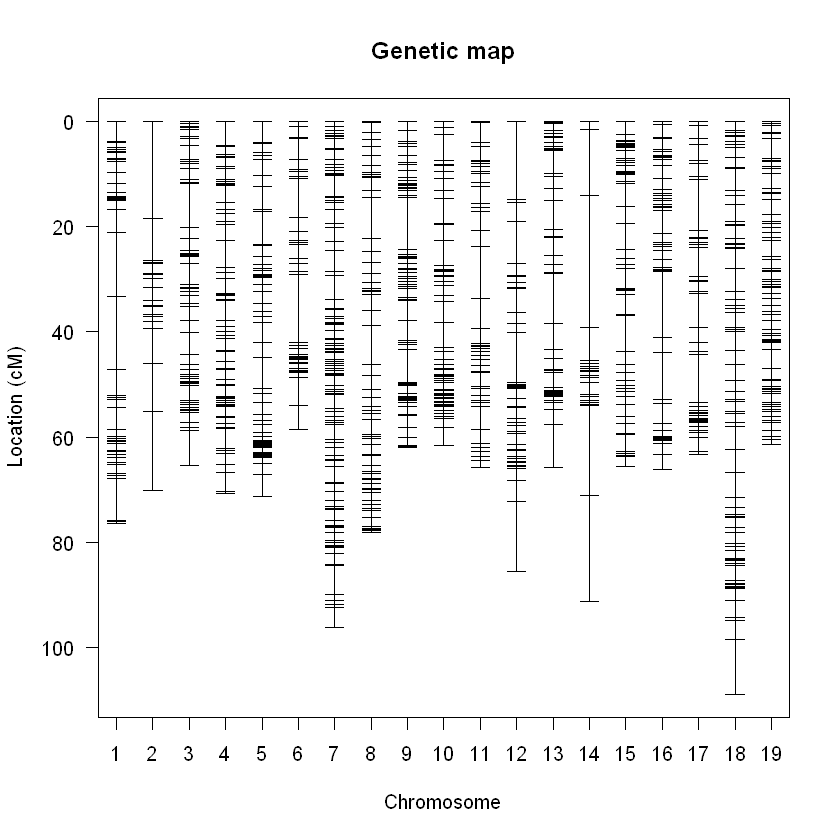

In [4]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

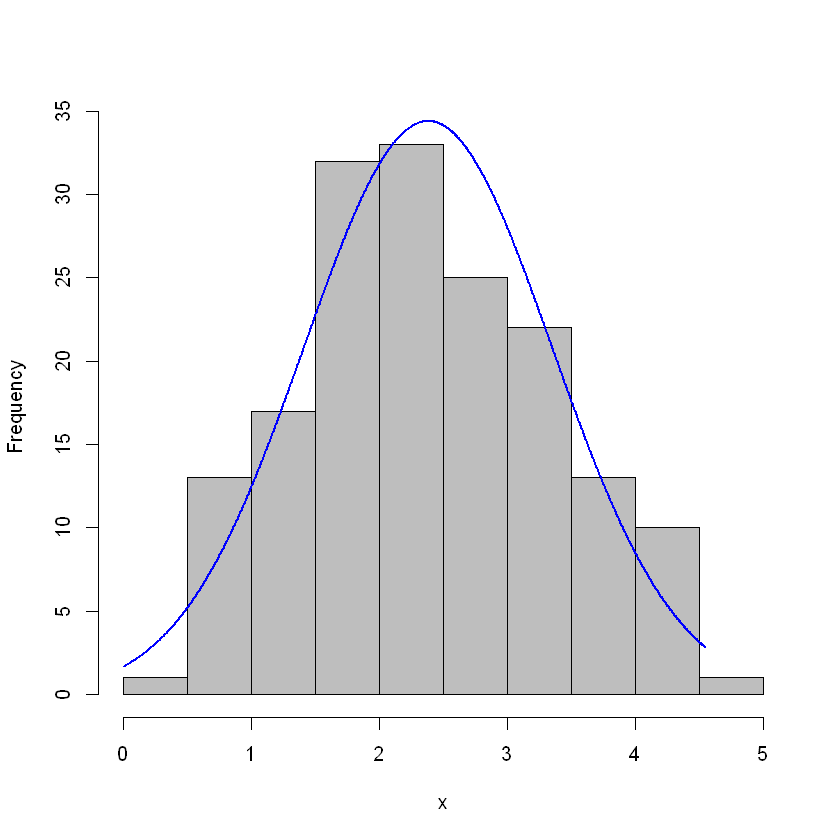

In [5]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this dataset. Will need to be analyized. 

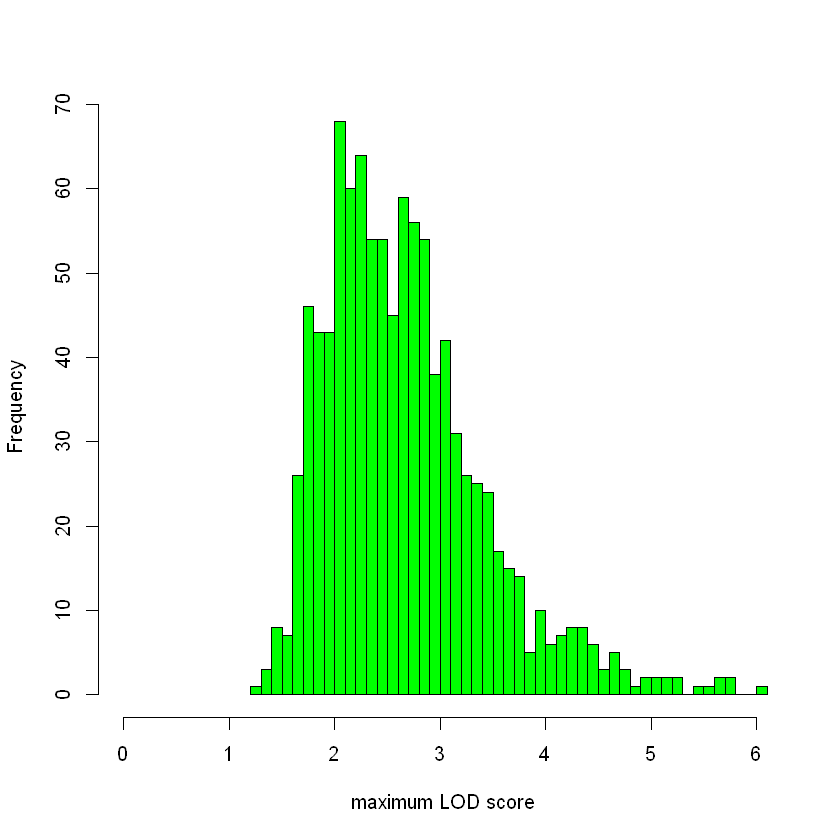

In [6]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
1_23828951,1,76.367049,1.2507884
2_3671868,2,34.953014,1.0420410
3_1058124,3,0.000000,0.7155357
4_2581004,4,8.537008,0.5986941
c5.loc6,5,6.000000,0.4322429
c6.loc27,6,27.000000,1.2978201
c7.loc86,7,86.000000,0.8232758
8_22223668,8,78.146065,1.9456221
c9.loc60,9,60.000000,0.6399115


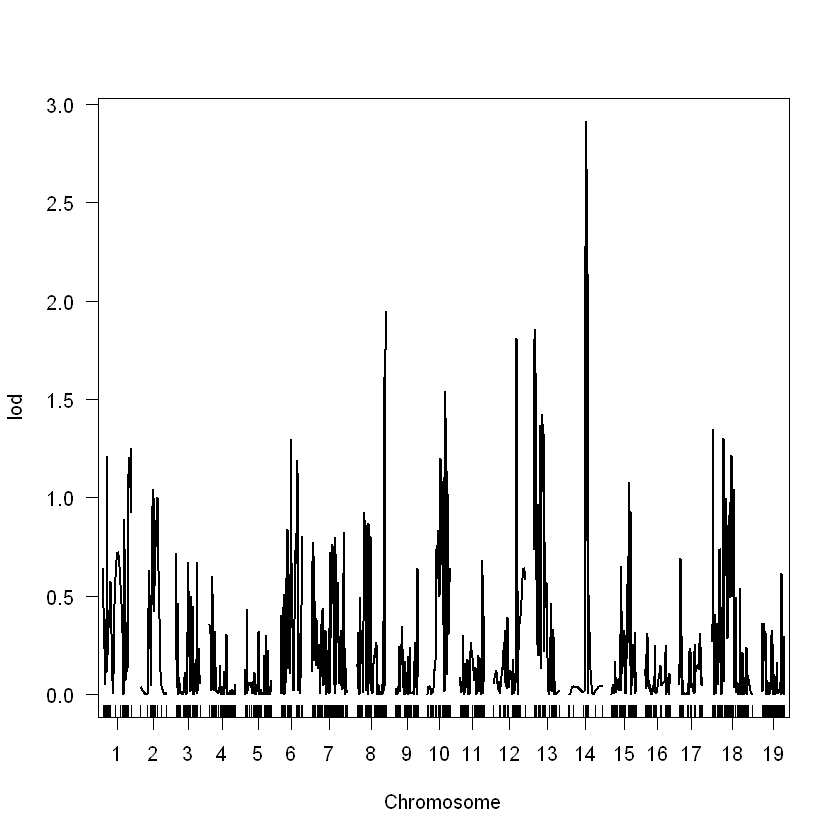

In [7]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

In [8]:
#Collecting enviroment variables
print("Make sure to input names AS THEY APPEAR on the csv!!") #Just a user warning
fileName <- readline("Enter file name (Either FemaleMap.csv or MaleMap.csv): ") #Mapping table file
genotypeName <- c(readline("First Genotype (homozygous) (For example ll): "),
                  readline("Second Genotype (heterozygous) (for example lm): ")) #For example "nn", "np"
alleleName <- c(substr(genotypeName[2],1,1) ,substr(genotypeName[2],2,2))
naNames <- c("NA","--") #For example "NA", "--"
colNum <- as.numeric(readline("Column Number: ")) #Column for pheno of interest

[1] "Make sure to input names AS THEY APPEAR on the csv!!"


Enter file name (Either FemaleMap.csv or MaleMap.csv):  MaleMap.csv
First Genotype (homozygous) (For example ll):  nn
Second Genotype (heterozygous) (for example lm):  np
Column Number:  25


 --Read the following data:
	 294  individuals
	 1128  markers
	 38  phenotypes


Warning message in summary.cross(cross):
"Some markers at the same position on chr 1,3,4,5,6,7,8,9,10,12,13,14,15,16,17,18,19; use jittermap()."


 --Cross type: bc 


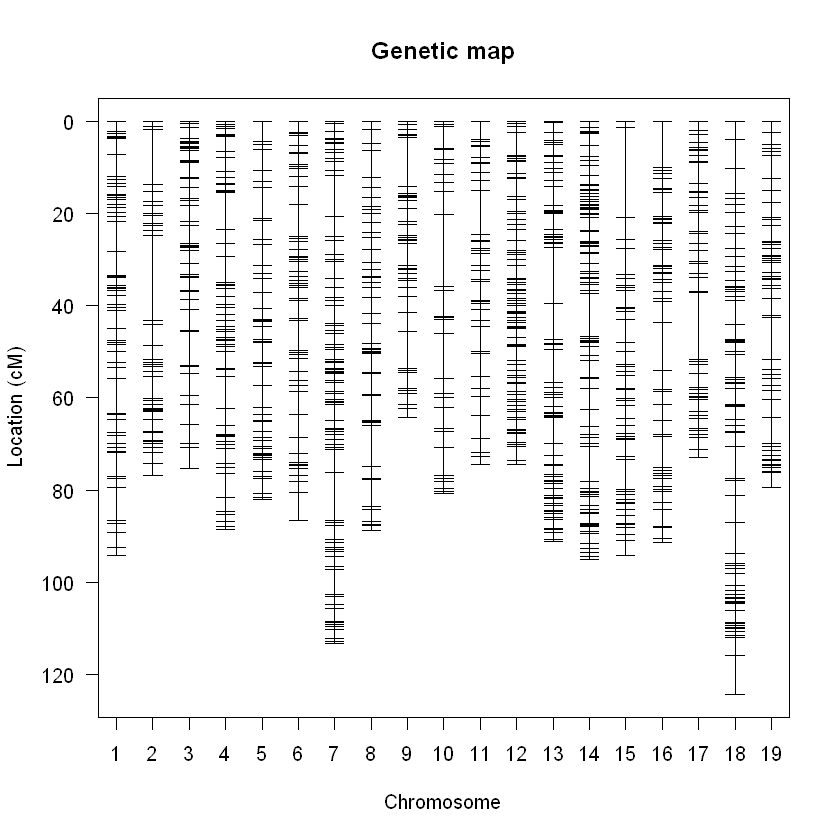

In [9]:
#Map generation
Map <- read.cross(format = 'csv',file = fileName 
                  ,genotypes = genotypeName,
                  alleles = alleleName,na.strings = naNames) #generate linkage map
Map <- jittermap(Map) #make sure no markers are in the same location
Map <- calc.genoprob(Map,step = 1,map.function = "kosambi") #associate markers with full genotypes
plot.map(Map) #draw linkage map

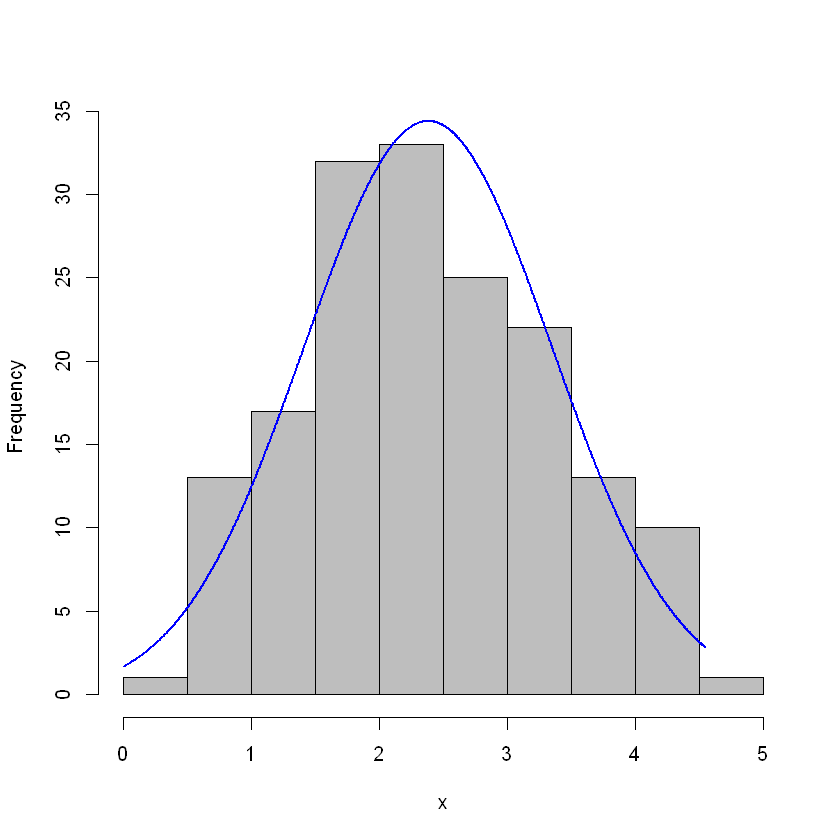

In [10]:
plotNormalHistogram(Map$pheno[,colNum]) #normal histogram of pheno of interest

Outliers exist in this data. 

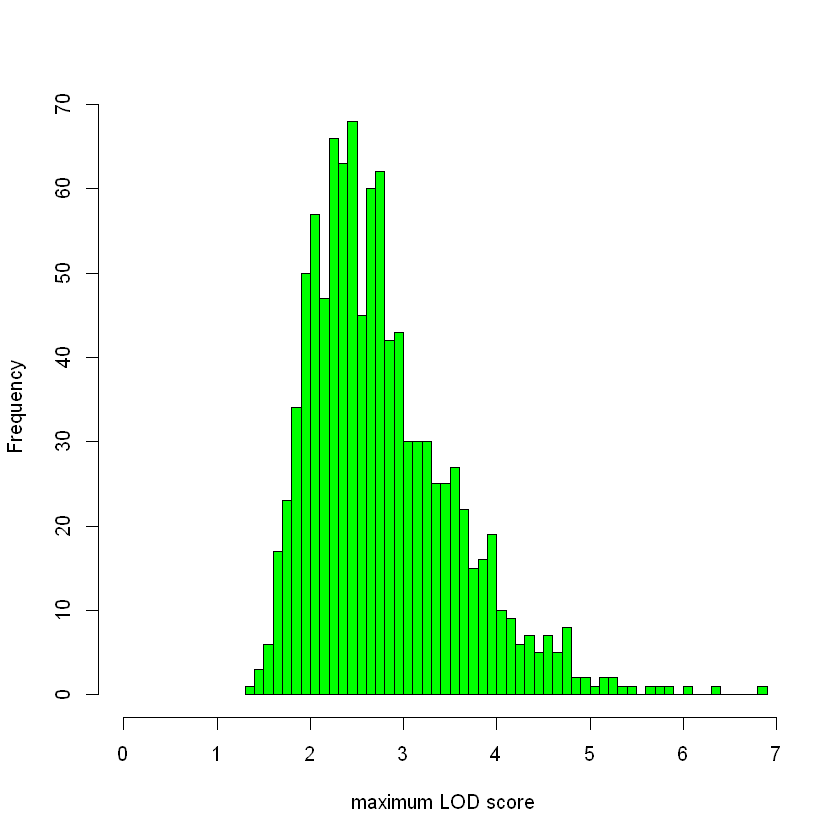

In [11]:
#Compute statistically significant values
TraitCIM1000 <- cim(Map,pheno.col = colNum,method = "hk",
                    map.function = "kosambi",n.perm = 1000) # Function will take a moment to run, determines LOD value
plot(TraitCIM1000,col = 'green') #show distribution of lod scores
LOD5 <- summary(TraitCIM1000)[1]

[1] "If nothing shows up, the values \n      are below the LOD5 score"


,chr,pos,lod
,<fct>,<dbl>,<dbl>
c1.loc88,1,88.000000,1.0546269
c2.loc1,2,1.000000,0.9387039
c3.loc18,3,18.000000,0.4006497
c4.loc19,4,19.000000,2.0107598
c5.loc74,5,74.000000,0.7740760
c6.loc16,6,16.000000,1.0233448
c7.loc66,7,66.000000,0.9489321
c8.loc17,8,17.000000,0.5316907
9_1015693,9,3.051004,0.5432223


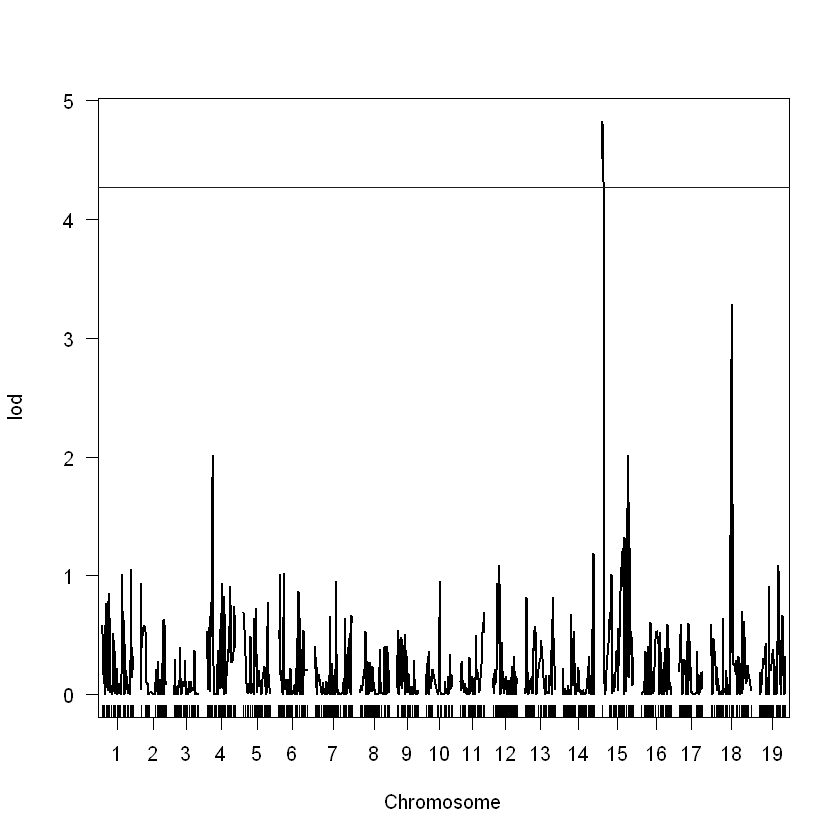

In [12]:
#Deterime LOD Values
TraitCIM<-cim(Map,pheno.col = colNum,method = "hk",
              map.function = "kosambi") #Generate LOD Values
plot(TraitCIM) #show LOD graph
abline(h = LOD5,col = "blue") #overlay statistically significant line
print("If nothing shows up, the values 
      are below the LOD5 score") #warning for no peaks
summary(TraitCIM)

Chromosome?  15
Would you like to investigate 
                  another chromosome? (Y/N):  N


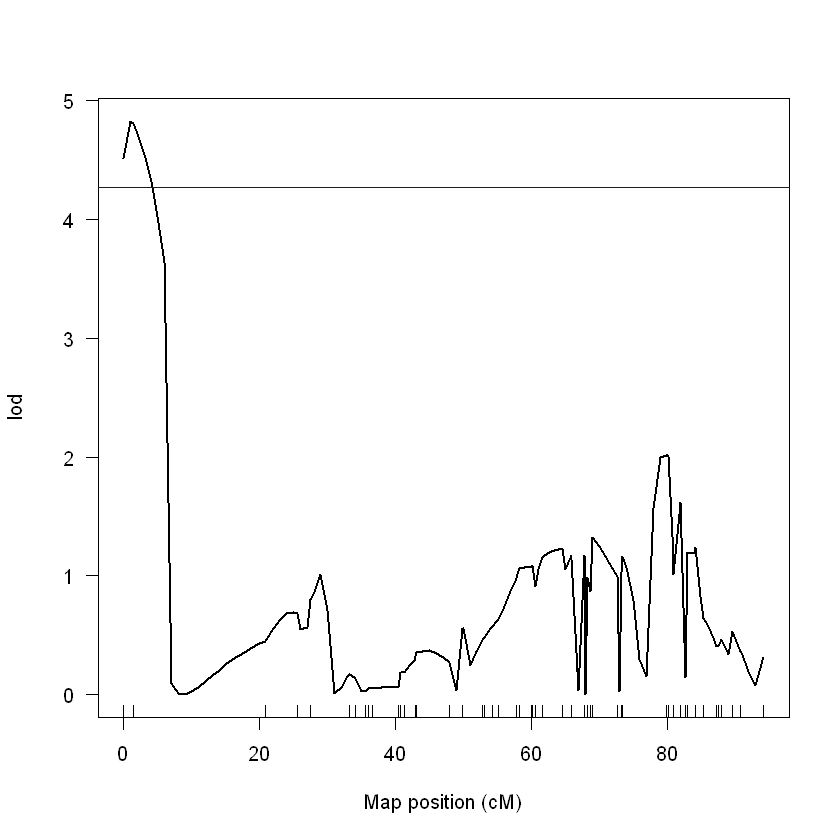

In [13]:
#Chromosomal Analysis
cont = 'Y' #Run loop on first run through
while(cont == 'Y'){
  chr <- as.numeric(readline("Chromosome? ")) #collect chromosome to look at
  plot(TraitCIM, chr = chr) #Plot chr LOD scores
  abline(h = LOD5, col = "blue") #Statistically Significant
  cont = readline("Would you like to investigate 
                  another chromosome? (Y/N): ") #Y if multiple
                  #chromosomes are to be investigated
}

In [14]:
bay <- scanone(Map, method = 'hk') #scan genome with sQTL model
bayesint(bay, chr = chr, prob=0.95, 
         expandtomarkers=TRUE) #calculate bayesian interval
lodint(bay, chr = chr,expandtomarkers = TRUE ) #calculate LOD Support interval

,chr,pos,lod
,<fct>,<dbl>,<dbl>
2_16557224,15,0.000000,1.542344e+00
2_16557277,15,1.332001,2.074231e+00
15_19559986,15,94.290051,6.730704e-05


,chr,pos,lod
,<fct>,<dbl>,<dbl>
2_16557224,15,0.000000,1.5423441
2_16557277,15,1.332001,2.0742308
15_15249593,15,65.896029,0.2428608


In [24]:
p <- as.numeric(readline("Position for analysis: "))
qtl <- makeqtl(Map, chr = chr, pos = p, what="prob") #pulls genotype probabilities
fitqtl <- fitqtl(Map, pheno.col=colNum, qtl = qtl, covar=NULL,
       method= "hk",model="normal",
       dropone=TRUE, get.ests=TRUE,run.checks=TRUE,
       tol=1e-4, maxit=1000, forceXcovar=FALSE) #sees how well our data fits a given formula 
          # If you see "error: object of type 'closure' is not subsettable", remove "formula," from the fitqtl argument list.
summary(fitqtl) #Print results of the analysis

Position for analysis:  1


Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"
Warning message in fitqtlengine(pheno = pheno, qtl = qtl, covar = covar, formula = formula, :
"Dropping 127 individuals with missing phenotypes.
"
Warning message in getsex(cross):
"125 individuals with missing sex; assuming they're female"



		fitqtl summary

Method: Haley-Knott regression 
Model:  normal phenotype
Number of observations : 167 

Full model result
----------------------------------  
Model formula: y ~ Q1 

       df        SS         MS      LOD     %var Pvalue(Chi2)    Pvalue(F)
Model   1  12.86662 12.8666235 3.127564 8.263082 0.0001475698 0.0001654462
Error 165 142.84553  0.8657305                                            
Total 166 155.71216                                                       


Estimated effects:
-----------------
              est      SE      t
Intercept 2.35586 0.07222 32.622
15@1.0    0.58692 0.15224  3.855
